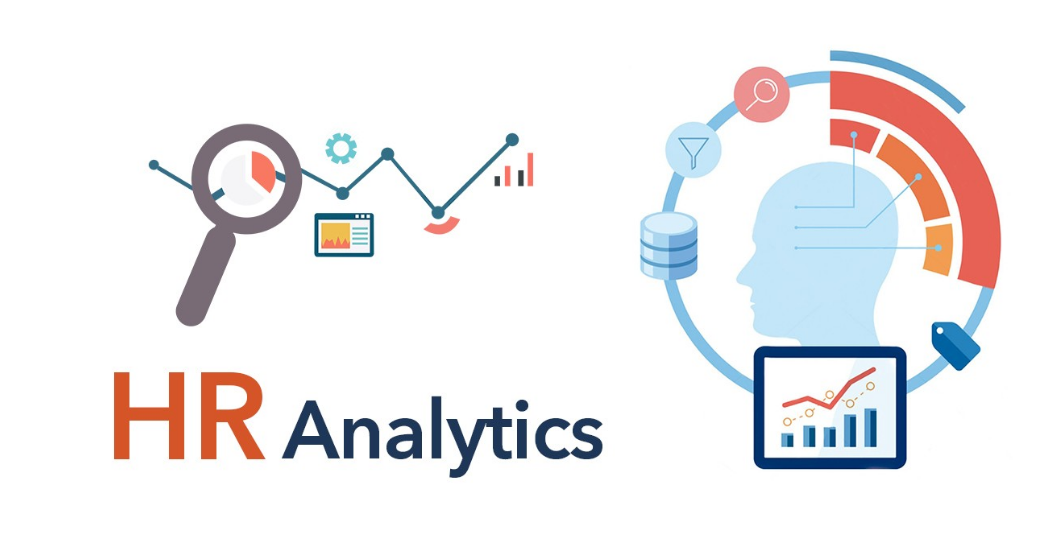

## HR Data Analysis 

In [28]:
import pandas as pd

df = pd.read_csv('Employee.csv')              # to load csv files
df_second = pd.read_csv('PerformanceRating.csv')        

# Cleaning process for : Employee.csv

### 1- Initial Review
to confirm the data is loaded successfully and to have an idea about the data we are working with 

In [29]:
print(df.head())                 # show first few rows

  EmployeeID   FirstName LastName      Gender  Age BusinessTravel  \
0  3012-1A41    Leonelle    Simco      Female   30    Some Travel   
1  CBCB-9C9D     Leonerd    Aland        Male   38    Some Travel   
2  95D7-1CE9       Ahmed    Sykes        Male   43    Some Travel   
3  47A0-559B  Ermentrude   Berrie  Non-Binary   39    Some Travel   
4  42CC-040A       Stace   Savege      Female   29    Some Travel   

        Department  DistanceFromHome (KM) State                Ethnicity  ...  \
0            Sales                     27    IL                    White  ...   
1            Sales                     23    CA                    White  ...   
2  Human Resources                     29    CA  Asian or Asian American  ...   
3       Technology                     12    IL                    White  ...   
4  Human Resources                     29    CA                    White  ...   

   MaritalStatus  Salary StockOptionLevel OverTime  HireDate  Attrition  \
0       Divorced  10205

#### shows data types and non-null counts (key for finding missing data)

In [30]:
print(df.info())                         #shows some info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

#### to spot any typos or inconsistencies

In [31]:
print(df.columns)                #Lists all column names

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


#### define columns with categorical values (non_numeric values)

In [32]:
categorical_cols_to_check = [
    'Gender', 'BusinessTravel', 'Department', 'State', 
    'Ethnicity', 'EducationField', 'JobRole', 'MaritalStatus', 
    'OverTime', 'Attrition' 
]

#### Loop through the list to Check for Unique Values to find (Inconsistencies & Typos)


In [33]:
for col in categorical_cols_to_check:
    print(f"\n=============================")
    print(f"--- Checking Column: {col} ---")
    print(f"=============================")
    print(df[col].value_counts(dropna=False)) 
    
    # dropna=False to see if there are any NaN/Nulls


--- Checking Column: Gender ---
Gender
Female               675
Male                 651
Non-Binary           124
Prefer Not To Say     20
Name: count, dtype: int64

--- Checking Column: BusinessTravel ---
BusinessTravel
Some Travel           1043
Frequent Traveller     277
No Travel              150
Name: count, dtype: int64

--- Checking Column: Department ---
Department
Technology         961
Sales              446
Human Resources     63
Name: count, dtype: int64

--- Checking Column: State ---
State
CA    875
NY    419
IL    176
Name: count, dtype: int64

--- Checking Column: Ethnicity ---
Ethnicity
White                               860
Black or African American           207
Mixed or multiple ethnic groups     198
Asian or Asian American             113
American Indian or Alaska Native     50
Native Hawaiian                      26
Other                                16
Name: count, dtype: int64

--- Checking Column: EducationField ---
EducationField
Computer Science       440

### we can see an inconsistent (repeated) value in "EducationField" column 
there is 2 different Marketing values, 

its probably an added space in one of them 
#### so we need to make them  exactly the  same to avoid any errors in the analysis stage 

In [34]:
df['EducationField'] = df['EducationField'].str.strip().str.title()

print(df['EducationField'].value_counts(dropna=False))

EducationField
Computer Science       440
Information Systems    363
Marketing              325
Economics              101
Business Studies        94
Other                   82
Technical Degree        38
Human Resources         27
Name: count, dtype: int64


### 2- Statistical Overview

In [35]:
print(df.shape)           #number of rows,columns

(1470, 23)


#### to spot outliers

In [36]:
print(df.describe())              #Provides summary statistics 

               Age  DistanceFromHome (KM)    Education         Salary  \
count  1470.000000            1470.000000  1470.000000    1470.000000   
mean     28.989796              22.502721     2.912925  112956.497959   
std       7.993055              12.811124     1.024165  103342.889222   
min      18.000000               1.000000     1.000000   20387.000000   
25%      23.000000              12.000000     2.000000   43580.500000   
50%      26.000000              22.000000     3.000000   71199.500000   
75%      34.000000              33.000000     4.000000  142055.750000   
max      51.000000              45.000000     5.000000  547204.000000   

       StockOptionLevel  YearsAtCompany  YearsInMostRecentRole  \
count       1470.000000     1470.000000            1470.000000   
mean           0.793878        4.562585               2.293197   
std            0.852077        3.288048               2.539093   
min            0.000000        0.000000               0.000000   
25%         

### 3- checking for duplicates and missing values

In [37]:
# Handling duplicates
df.duplicated().sum()

np.int64(0)

#### there are no duplicates

In [38]:
# checking missing value
df.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

#### there's no NULL values

### 4- verification, final results 

In [39]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

### Now exporting the results as a csv file for analysis

In [73]:
df.to_csv('Employee_cleaned.csv', index=False)

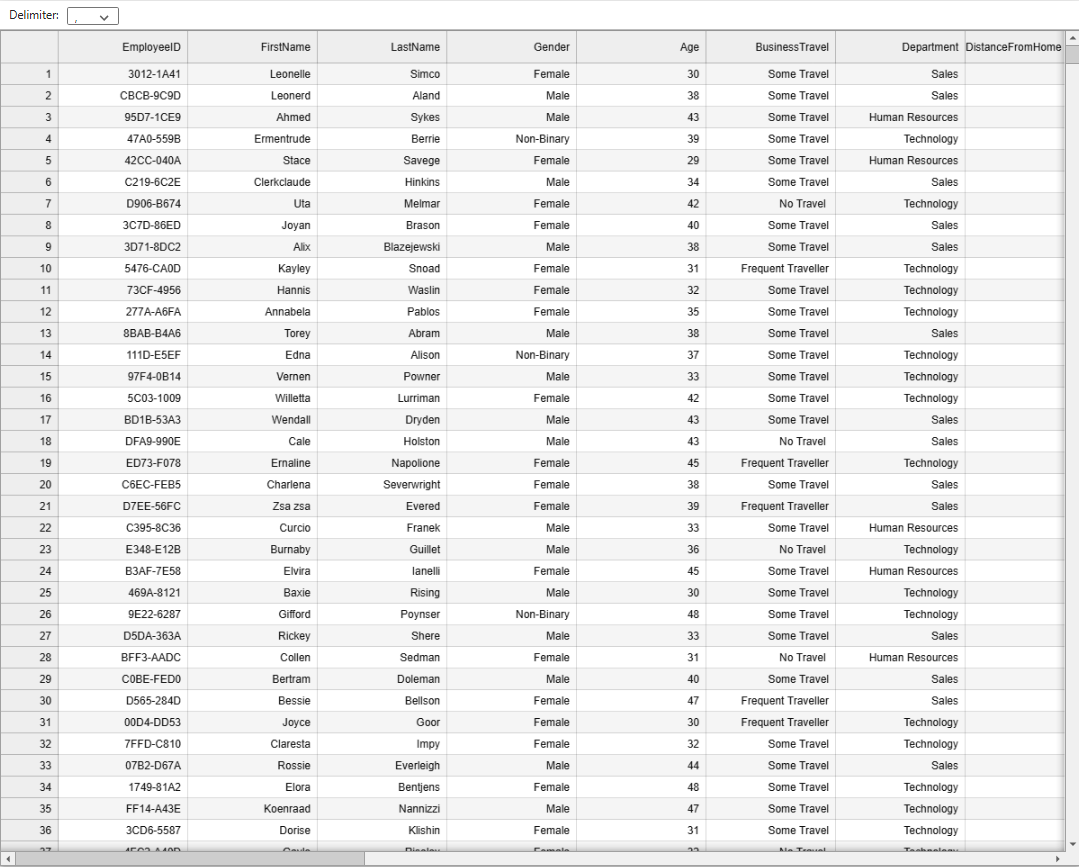

# Cleaning process for : PerformanceRating.csv

### 1- Initial Review
to confirm the data is loaded successfully and to have an idea about the data we are working with 

print(df_second.head())                 # show first few rows


#### shows data types and non-null counts (key for finding missing data)


In [40]:
print(df_second.info())                         #shows some info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

#### to spot any typos or inconsistencies


In [41]:
print(df.columns)                #Lists all column names

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


### 2- Statistical Overview


In [42]:
print(df_second.shape)           #number of rows,columns


(1470, 23)


#### to spot outliers


In [43]:
print(df_second.describe())              #Provides summary statistics 


               Age  DistanceFromHome (KM)    Education         Salary  \
count  1470.000000            1470.000000  1470.000000    1470.000000   
mean     28.989796              22.502721     2.912925  112956.497959   
std       7.993055              12.811124     1.024165  103342.889222   
min      18.000000               1.000000     1.000000   20387.000000   
25%      23.000000              12.000000     2.000000   43580.500000   
50%      26.000000              22.000000     3.000000   71199.500000   
75%      34.000000              33.000000     4.000000  142055.750000   
max      51.000000              45.000000     5.000000  547204.000000   

       StockOptionLevel  YearsAtCompany  YearsInMostRecentRole  \
count       1470.000000     1470.000000            1470.000000   
mean           0.793878        4.562585               2.293197   
std            0.852077        3.288048               2.539093   
min            0.000000        0.000000               0.000000   
25%         

### 3- checking for duplicates and missing values


In [44]:
# Handling duplicates
df_second.duplicated().sum()

np.int64(0)

#### there are no duplicates

In [45]:
# checking missing value
df_second.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

#### there's no NULL values

### 4- verification, final results


In [46]:
print(df_second.info())
print ('=========================================================================================')
print(df_second.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

### Now exporting the results as a csv file for analysis


In [49]:
df.to_csv('PerformanceRating.csv', index=False)


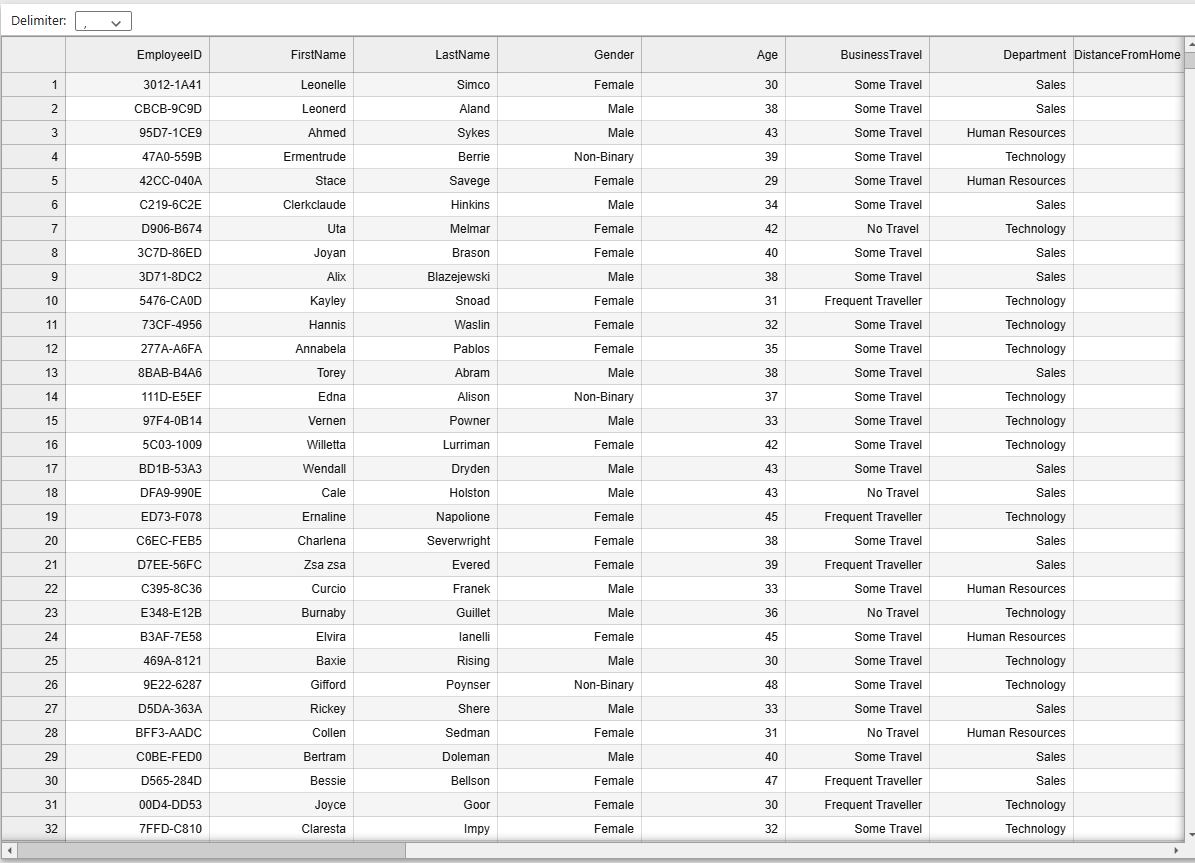

## now after every thing is clean and consistent we can move on to the next stage which is  analysis